In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
column_names = ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area", "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"]

energy = pd.read_excel("energy_efficiency.xlsx", columns=column_names)
energy.columns = column_names

In [3]:
energy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
energy.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
simple_linear_regr = energy[["Relative_Compactness", "Cooling_Load"]].sample(15, random_state=2)

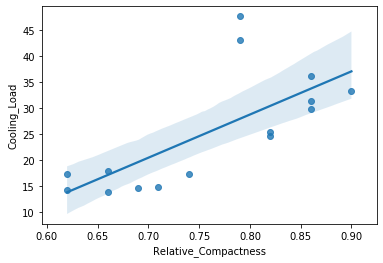

In [22]:
sns.regplot(simple_linear_regr["Relative_Compactness"], simple_linear_regr["Cooling_Load"])

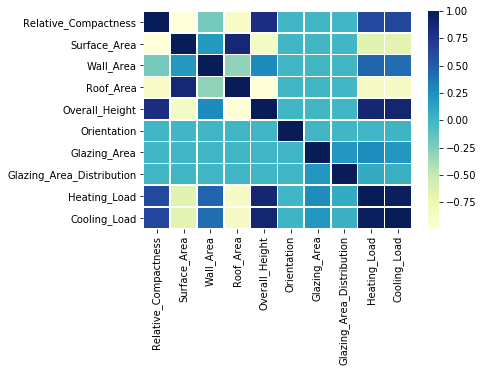

In [15]:
sns.heatmap(energy.corr(), linewidths=.5, cmap="YlGnBu", )

In [19]:
# Mean Absolute Error

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_energy = pd.DataFrame(scaler.fit_transform(energy), columns=column_names)
features_energy = normalized_energy.drop(columns=["Heating_Load", "Cooling_Load"])

heating_target = normalized_energy["Heating_Load"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(features_energy, heating_target, test_size=0.3, random_state=1)

In [21]:
linear_model = LinearRegression()

linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predicted_values = linear_model.predict(x_test)

In [23]:
# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)
print(round(mae, 3))

0.063


In [25]:
# RSS
import numpy as numpy

rss = np.sum(np.square(y_test - predicted_values))
print(round(rss, 3))

1.817


In [27]:
# RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

print(round(rmse, 3))

0.089


In [28]:
# RSQUARED

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print(round(r2_score, 3))

0.894


In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
ridge_reg.coef_

array([-0.2834707 , -0.06227514,  0.10306088, -0.16319198,  0.44246749,
        0.00336858,  0.21244937,  0.0290877 ])

In [30]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)

    return weights_df

In [45]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')

In [46]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')

final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [47]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482
